In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [40]:
def f(x,y):
    return (y - 36)**2 + (x + 49)**2

In [41]:
def df_dx(x,y) :
    return 2*(x + 49)

def df_dy(x,y) :
    return 2*(y - 36)

In [42]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)


In [43]:
def gradient_descent(x_start , y_start , alpha_not , gamma , rho) :
    tablelist=[]
    tau_values = []
    iteration_counts = []

    for alp_not in alpha_not :

        x = x_start
        y = y_start
        alpha = alp_not
        history =[]
        count = 0
        norm = L2Norm(x,y)
        TLevel = 10**(-10)

        while(f(x-alpha*df_dx(x,y) , y-alpha*df_dy(x,y)) > (f(x,y)-alpha*gamma*(df_dx(x,y)**2 + df_dy(x,y)**2))) :
            alpha = rho * alpha
        while(norm > TLevel) :
            grad_x = df_dx(x,y)
            grad_y = df_dy(x,y)

            
            x = x - alpha*grad_x
            y = y - alpha*grad_y

            norm = L2Norm(x,y)
            count = count + 1;
                

            history.append((x,y,f(x,y)))
        
        
        iteration_counts.append(count)

        tablelist.append((alp_not , count , x , y , f(x,y) ))
        table_array = np.array(tablelist)

    print("alpha_not         Iterations      x       y       f(x,y) ")
    print(table_array)

    plt.figure(figsize=(8, 6))
    plt.plot(alpha_not, iteration_counts, marker='o', color='blue', label='Iterations vs Tolerance')
   
    plt.xlabel('alpha_not')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations vs alpha_not')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


    return x,y,f(x,y),history 



alpha_not         Iterations      x       y       f(x,y) 
[[ 1.00000000e+00  1.00000000e+00 -4.90000000e+01  3.60000000e+01
   0.00000000e+00]
 [ 9.00000000e-01  1.30000000e+01 -4.90000000e+01  3.60000000e+01
   2.62997895e-22]
 [ 7.50000000e-01  2.10000000e+01 -4.90000000e+01  3.60000000e+01
   1.35952304e-21]
 [ 6.00000000e-01  3.20000000e+01 -4.90000000e+01  3.60000000e+01
   8.94816562e-22]
 [ 5.00000000e-01  1.00000000e+00 -4.90000000e+01  3.60000000e+01
   0.00000000e+00]
 [ 4.00000000e-01  1.80000000e+01 -4.90000000e+01  3.60000000e+01
   1.80700038e-21]
 [ 1.00000000e-01  1.30000000e+02 -4.90000000e+01  3.60000000e+01
   1.67215212e-21]
 [ 2.50000000e-01  4.20000000e+01 -4.90000000e+01  3.60000000e+01
   1.35952304e-21]
 [ 1.00000000e-02  1.42600000e+03 -4.90000000e+01  3.60000000e+01
   2.49130937e-21]]


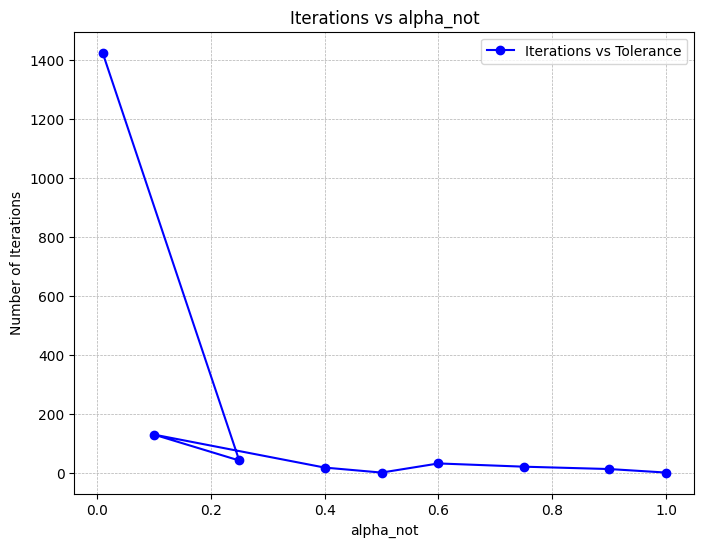

In [ ]:
x_range = np.arange(-150,150,0.1)
y_range = np.arange(-150,150,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = 100 , 100
alpha_not = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

gamma , rho = 0.5 , 0.5

x_dash ,y_dash ,f_dash ,history = gradient_descent(x_start , y_start , alpha_not , gamma , rho)


In [45]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

2.4913093745480103e-21
Minimiser in x =  -48.999999999954134
Minimiser in y =  36.00000000001969


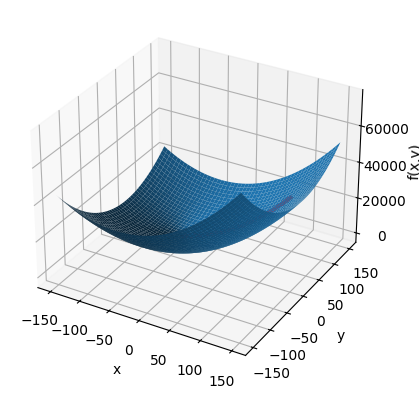

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(*zip(*history), c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
